Revelamos el grado magico en el que un modelo no entrenado se vuelve sobreaprendizaje.

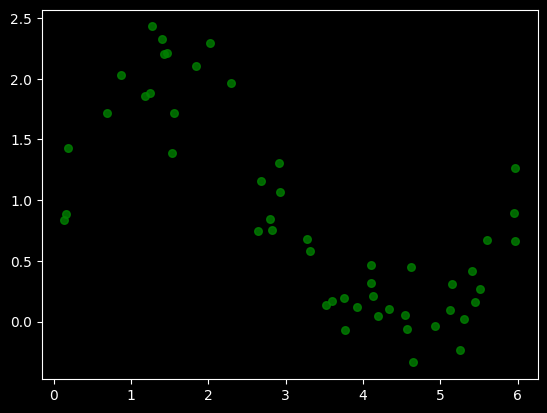

In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\Ульяна\Desktop\jupiter\datasets\3.10_non_linear.csv')

data.head(5)

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data.x_train, data.y_train, 30, 'g', 'o', alpha=0.8)
plt.show()

Enseñamos regresión polinómica para diferentes grados de polinomio: muy grande, muy pequeño y medio. 

La norma del vector es la raíz de la suma de los cuadrados de los coeficientes de regresión lineal.

In [20]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [21]:
# Genera una matriz de características para la regresión polinómica a un grado especificado
def generate_degrees(source_data: list, degree: int):
    return np.array([source_data**n for n in range(1, degree + 1)]).T

# Esta función realiza el entrenamiento de regresión polinómica
def train_polynomial(degree, data):
    
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    print(f"Polinomio de grado {degree}")
    print("Error en la validación:", error_valid)
    print("Error en el entrenamiento:", error_train)
  
    
    order_test = np.argsort(X_valid[:,0]) # Ordena los valores de validación de X en orden ascendente
    plt.scatter(X_valid[:,0][order_test], y_valid[order_test], 40, 'r', 'o', alpha=0.8)
    print("Norma del vector de pesos \t||w|| = %.2f" % (norm(model.coef_)))
    
    # visualizamos la solución
    x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace)
    return error_valid, error_train, norm(model.coef_)

degrees = []
valid_errors = []
train_errors = []
w_norm = []

Vamos a hacer un experimento para ver cómo los datos de entrada afectan los coeficientes de regresión lineal.

Polinomio de grado 3
Error en la validación: 0.05063441919206106
Error en el entrenamiento: 0.07744269978781701
Norma del vector de pesos 	||w|| = 2.19


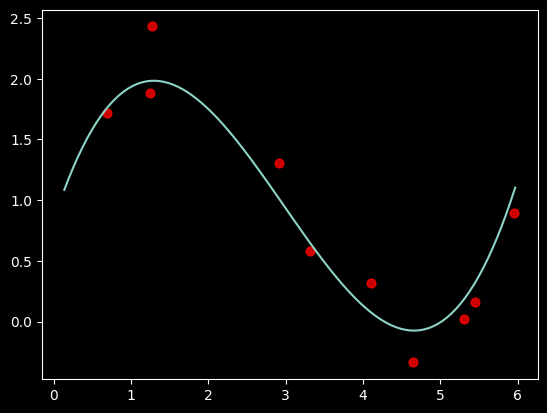

In [22]:
degree = 3

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Polinomio de grado 5
Error en la validación: 0.06271908697907208
Error en el entrenamiento: 0.06938399857231442
Norma del vector de pesos 	||w|| = 3.31


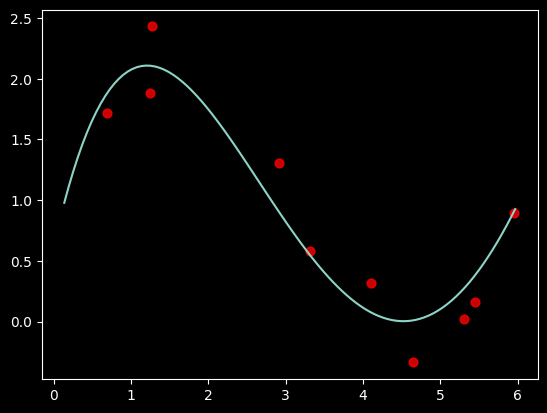

In [23]:
degree = 5

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Polinomio de grado 10
Error en la validación: 0.12191894524223419
Error en el entrenamiento: 0.05188549050323108
Norma del vector de pesos 	||w|| = 120.14


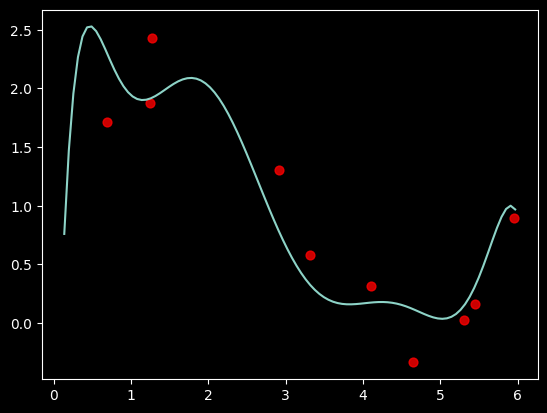

In [24]:
degree = 10

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

En este experimento abstracto: se ven los siguientes patrones

- el grado del polinomio crece → *el error en los datos de entrenamiento cae*
- el grado del polinomio crece → *el error en la validación crece*
- el grado del polinomio crece → *la suma de los cuadrados de los coeficientes de regresión crece*

C:\Users\Ульяна\AppData\Local\Temp\ipykernel_4312\2403365764.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(degrees, valid_errors, 'k--', label='Validation error', color='white')
C:\Users\Ульяна\AppData\Local\Temp\ipykernel_4312\2403365764.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax.plot(degrees, train_errors, 'k:', label='Train error', color='white')


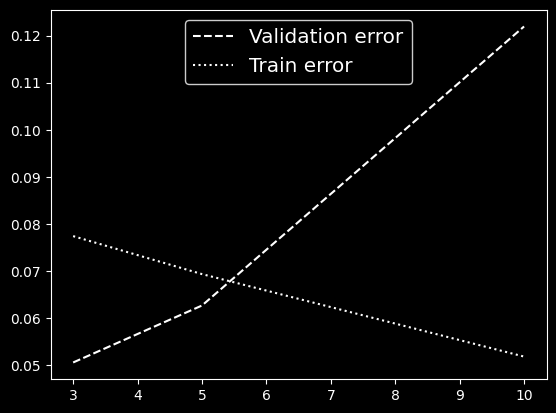

In [25]:
from matplotlib import pyplot
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(degrees, valid_errors, 'k--', label='Validation error', color='white')
ax.plot(degrees, train_errors, 'k:', label='Train error', color='white')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

Este punto es donde las dos líneas de error se cruzan. En este punto, que corresponde al grado del polinomio degree=5, el modelo es lo suficientemente bueno en el aprendizaje y no demasiado malo en la validación.

Entrenaremos dos modelos : uno con un coeficiente de regularización α=0.01 y el segundo sin regularización α=0.0:

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.48984e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.26203e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


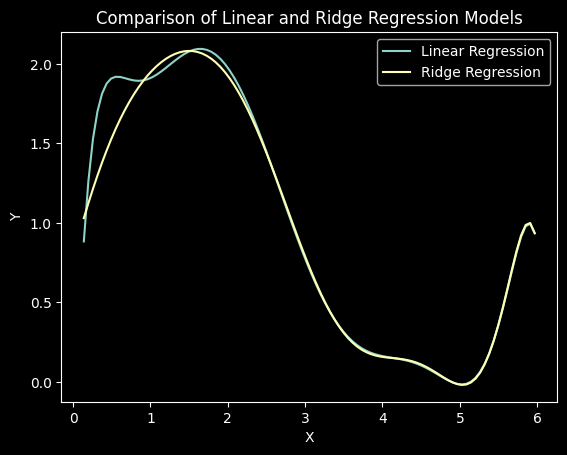

In [26]:
from sklearn.linear_model import Ridge

#plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

model_ridge = Ridge(alpha=0.01)
model_linear = Ridge(alpha=0.0)
degree = 10

X = generate_degrees(data['x_train'], degree)
y = data['y_train'].values

# aprende regresión lineal con regularización
model_ridge.fit(X, y)
model_linear.fit(X, y)

x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)

y_linspace_linear = model_linear.predict(generate_degrees(x_linspace, degree))
y_linspace_ridge = model_ridge.predict(generate_degrees(x_linspace, degree))

plt.plot(x_linspace, y_linspace_linear, label='Linear Regression')
plt.plot(x_linspace, y_linspace_ridge, label='Ridge Regression')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Linear and Ridge Regression Models')

plt.legend()
plt.show()

El modelo regularizado es más" suave", pero el modelo sin regularización tiene torceduras: parece demasiado entrenado. Verifiquemos los coeficientes de regresión.

In [27]:
print("Norma del vector de pesos Ridge \t||w|| = %.2f" % (norm(model_ridge.coef_)))
print("Norma del vector de pesos Linear \t||w|| = %.2f" % (norm(model_linear.coef_)))

Norma del vector de pesos Ridge 	||w|| = 1.94
Norma del vector de pesos Linear 	||w|| = 72.40


El modelo regularizado es más suavizado que no regularizado. La regularización permite combatir la complejidad excesiva del modelo imponiendo restricciones adicionales al vector de pesos del modelo.